<a href="https://colab.research.google.com/github/venussar/Roots-of-equations./blob/main/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5.1: Newton Rapson method

- - -

<font color='red'>
**ACTIVITY**
    
In an Jupyter-notebook, copy the NewtonRaphson routine, the Bisection routine, the Fixed-point routine and find the root of the next function using all the methods.
    
$f(x) = x - \cos(x)$
    
Plot in the same figure the convergence of each method as a function of the number of iterations.
</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  funcion = x - np.cos(x)
  return funcion

In [ ]:
def derivada(x):
  derivada = 1 + np.sin(x)
  return derivada

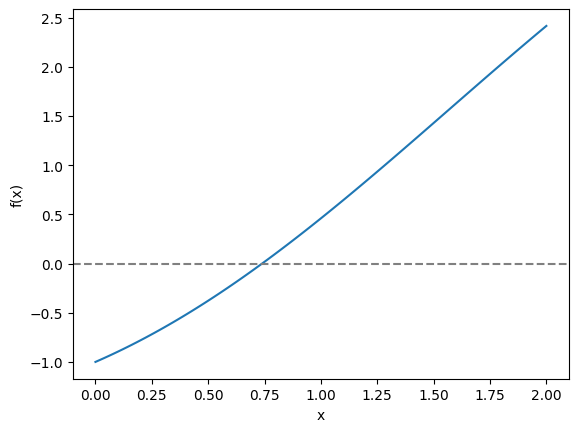

In [ ]:
x = np.linspace(0, 2, 100)
y=f(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='gray', linestyle='--')  # Línea y = 0

Newton Method

In [ ]:
#Defining Newton Method
def NewtonRaphson( f, fp, pini, Nmax):
    #Initial condition
    p = [pini,]
    #Iterations.
    for n in range(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )

    p = np.array( p )

    return p[-1]

    #print("Result:", p[-1])

In [ ]:
pini=0.5
Nmax=4
NewtonRaphson( f, derivada, pini, Nmax)

np.float64(0.7390851332151607)

PUNTO FIJO

In [ ]:
Nmax=7

In [ ]:
#Fixed Point strategy
def FixedPoint( f, pini, Nmax):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    #Iterations
    for n in range(Nmax+3):
        pi.append( g(pi[n]) )

    pi = np.array( pi )
    #print(pi)

    return pi[-1]

In [ ]:
FixedPoint( f, pini, Nmax)

np.float64(0.7350063090148431)

Con Nmax=4 no es suficiente para una buena aproximacion, Con Nmax=7 se aproxima un poco mas pero apartir de ahi empieza ser muy inestable, sube y baja el valor

BISECCION

In [ ]:
#Defining Bisection function
def Bisection( f, a, b, Nmax, printer=False ):
    #verifying the STEP1, a and b with different signs
    if f(a)*f(b)>0:
        print("Error, f(a) and f(b) should have opposite signs")
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print("Value for %d iterations:"%n,pi)
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

In [ ]:
Bisection( f, 0.5, 1, Nmax)

0.740234375

Podemos ver que aunque usemos un intervalo cerca de la raiz aun asi no es capaz de aproximarla del todo..

- - -

# Lab 5.2: Secant method

- - -

<font color='red'>
**ACTIVITY**
    
In an Jupyter-notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

In [ ]:
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=5):
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)

        if f1 - f0 == 0:
            raise ValueError("Denominador igual a cero")

        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        error = abs(x2 - x1)

        if error < tol:
            return x2

        x0, x1 = x1, x2


In [ ]:
metodo_secante(f,0.5,1)

np.float64(0.7390851332151605)

CON N=5 ALCANZA LA MAXIMA APROXIMACIO